In [10]:
# Not all are necessary
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

from data_cleaning.data_cleaner import DataCleaner

In [3]:
project_root = os.getcwd()
sys.path.append(os.path.abspath(project_root))

In [19]:
dc: DataCleaner = DataCleaner(project_root + '/raw-data/GlobalLandTemperaturesByCountry.csv')
dc.filter_by_column(column='Country', value='Indonesia')
dc.handle_missing(column='AverageTemperature', strategy='drop')
print(dc.count_missing_values())
dc.preview(10)

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
246308,1825-01-01,25.915,1.825,Indonesia
246309,1825-02-01,25.385,0.973,Indonesia
246310,1825-03-01,25.687,1.656,Indonesia
246311,1825-04-01,26.302,1.897,Indonesia
246312,1825-05-01,25.705,0.902,Indonesia
246313,1825-06-01,26.161,0.836,Indonesia
246314,1825-07-01,25.567,2.009,Indonesia
246315,1825-08-01,24.970,1.858,Indonesia
246316,1825-09-01,24.870,1.439,Indonesia
246317,1825-10-01,24.788,1.580,Indonesia


In [20]:
# Drop unneeded columns
columns_to_drop = ['AverageTemperatureUncertainty']
dc.drop(columns_to_drop)
dc.preview(10)

,dt,AverageTemperature,Country
246308,1825-01-01,25.915,Indonesia
246309,1825-02-01,25.385,Indonesia
246310,1825-03-01,25.687,Indonesia
246311,1825-04-01,26.302,Indonesia
246312,1825-05-01,25.705,Indonesia
246313,1825-06-01,26.161,Indonesia
246314,1825-07-01,25.567,Indonesia
246315,1825-08-01,24.970,Indonesia
246316,1825-09-01,24.870,Indonesia
246317,1825-10-01,24.788,Indonesia


In [21]:
# Add new column containing monly offset from 1825-01-01
# Convert 'dt' column to datetime
dc.df['dt_formatted'] = pd.to_datetime(dc.df["dt"])

# Compute the month offset (monotonically increasing) from the first date
dc.df['month_offset'] = (dc.df['dt_formatted'].dt.year - dc.df["dt_formatted"].min().year) * 12 + dc.df["dt_formatted"].dt.month - dc.df["dt_formatted"].min().month + 1

# Sort my offset
dc.sort_column('month_offset')
dc.preview(n=100)

,dt,AverageTemperature,Country,dt_formatted,month_offset
0,1825-01-01,25.915,Indonesia,1825-01-01,1
1,1825-02-01,25.385,Indonesia,1825-02-01,2
2,1825-03-01,25.687,Indonesia,1825-03-01,3
3,1825-04-01,26.302,Indonesia,1825-04-01,4
4,1825-05-01,25.705,Indonesia,1825-05-01,5
...,...,...,...,...,...
95,1856-01-01,25.569,Indonesia,1856-01-01,373
96,1856-02-01,24.832,Indonesia,1856-02-01,374
97,1856-03-01,25.099,Indonesia,1856-03-01,375
98,1856-04-01,25.289,Indonesia,1856-04-01,376


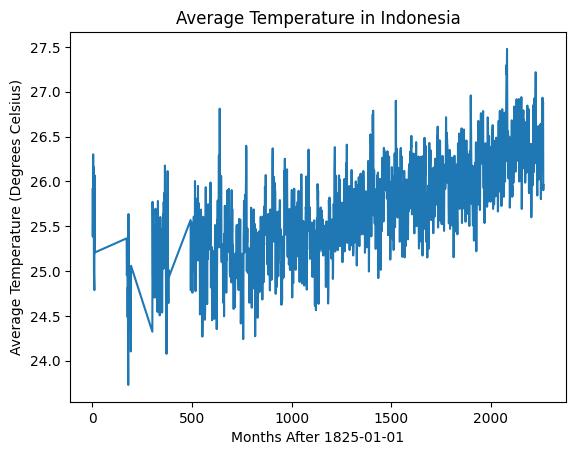

In [27]:
# Check for unique values (if all unique values for each month_offset no need to aggregate - unless aggregating over country)
if dc.df['month_offset'].nunique() == dc.df['month_offset'].count():
    plt.plot(dc.df['month_offset'], dc.df['AverageTemperature'])
    plt.xlabel(f"Months After {dc.df['dt'][0]}")
    plt.ylabel(f"Average Temperature (Degrees Celsius)")
    plt.title("Average Temperature in Indonesia")

#dc.aggregate_data(['Country'], 'mean')
#dc.preview(50)

In [28]:
output_path = project_root + '/clean-data/processed_country_temperature_data.csv'
dc.save_data(output_path)

Data successfully saved to c:\Users\Ethan Crook\Documents\Computer Science 562\ML-Climate-Project/clean-data/processed_country_temperature_data.csv
